In [2]:
import numpy as np 
from subprocess import Popen, PIPE, STDOUT
import os
import matplotlib.pyplot as plt
import galsim
import copy 
import treecorr

In [3]:
%pylab inline
from astropy.table import Table
import fitsio

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
#directories that would be using 
WLD = '/Users/Ismael/code/lensing/WeakLensingDeblending/'
repo = '/Users/Ismael/code/lensing/repo/'
os.chdir(WLD)

### Read catalogs 

In [6]:
#includes no cosmic shear. lsst chip. 
catalog1 = Table.read('lsst_i_1.fits', hdu=1)

In [7]:
#includes cosmic shear .01,.02; lsst chip. 
catalog2 = Table.read('lsst_i_2.fits', hdu=1)

In [8]:
#includes cosmic shear .01,.01; lsst chip. 
catalog3 = Table.read('lsst_i_3.fits', hdu=1) 

In [ ]:
#includes no cosmic shear 0,0; full 800K galaxies. 
catalog4 = Table.read('sim_one_sqdeg1.fits', hdu=1)

In [ ]:
#includes no cosmic shear .1,.2; full 800K galaxies. 
catalog5 = Table.read('sim_one_sqdeg2.fits', hdu=1)

In [ ]:
#includes no cosmic shear .1,.1; full 800K galaxies. 
catalog6 = Table.read('sim_one_sqdeg3.fits', hdu=1)

### Group statistics 

19.4545916227
19.4084525702
19.4383501148


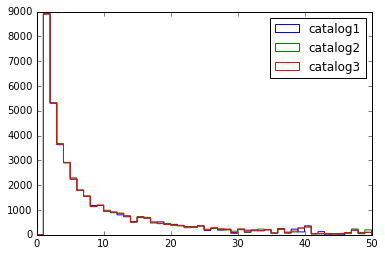

In [53]:
# group statistics 
plt.hist(catalog1['grp_size'], histtype='step', label='catalog1',range=(0,50),bins=50)
plt.hist(catalog2['grp_size'], histtype='step',label='catalog2',range=(0,50),bins=50)
plt.hist(catalog3['grp_size'], histtype='step',label='catalog3',range=(0,50),bins=50)
plt.legend(loc='upper right')
print catalog1['grp_size'].mean()
print catalog2['grp_size'].mean()
print catalog3['grp_size'].mean()
#do not seem to change group statistics significantly by applying cosmic shear. 

20097
20194
20124
0.00223546
0.014508
0.0147246


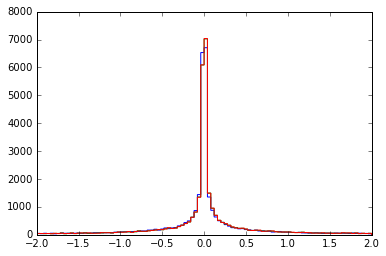

In [76]:
plt.hist(catalog1['bias_g1'], histtype='step', label='catalog1',range=(-2,2),bins=100)
plt.hist(catalog2['bias_g1'], histtype='step',label='catalog2',range=(-2,2),bins=100)
plt.hist(catalog3['bias_g1'], histtype='step',label='catalog3',range=(-2,2),bins=100)
#count number of 'bad' objects in each. 
print len(catalog1[(abs(catalog1['bias_g1']) > 1) | (abs(catalog1['bias_g2']) > 1)])
print len(catalog2[(abs(catalog2['bias_g1']) > 1) | (abs(catalog2['bias_g2']) > 1)])
print len(catalog3[(abs(catalog3['bias_g1']) > 1) | (abs(catalog3['bias_g2']) > 1)])
#mean of each gold_sample? 
gold1 = catalog1[(catalog1['ab_mag'] < 25.3)] 
gold2 = catalog2[(catalog2['ab_mag'] < 25.3)] 
gold3 = catalog3[(catalog3['ab_mag'] < 25.3)] 
print gold1['bias_g1'].mean()
print gold2['bias_g1'].mean()
print gold3['bias_g1'].mean()

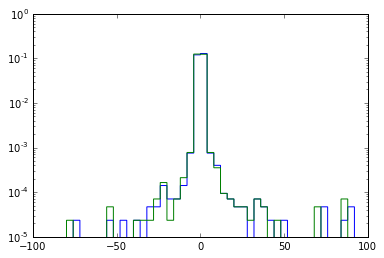

In [75]:
plt.hist(gold2['bias_g1'], histtype='step', range=(-100,100),bins=50, normed=1)
plt.yscale('log')
plt.hist(gold1['bias_g1'], histtype='step', range=(-100,100),bins=50, normed=1)
plt.yscale('log')

### Catalogue1 analysis

In [8]:
catalog1

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,bias_f,bias_s,bias_g1,bias_g2,bias_x,bias_y,bias_f_grp,bias_s_grp,bias_g1_grp,bias_g2_grp,bias_x_grp,bias_y_grp,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
2214322509,2200170838,36,35,1,3236,3247,444,454,1.0,0.0,238.819,-319.693,0.516401,27.4169,0.518883,12149.3,1.08088,1.11031,0.073753,-0.146366,1.27528,0.916113,-0.552019,1.25073,0.409874,0.888373,0.888307,0.888224,0.227531,0.219346,4.20776,2.72145,2.87452,320893.0,11.2382,1.10926,-2.01458,0.0950256,0.0747375,335043.0,11.4197,1.07438,-2.39015,0.547393,0.252749,4.32714,2.7763,2.97733,nan,nan,nan,0.0,0.0
2213221225,2200170838,36,28,1,3201,3209,452,461,1.0,0.0,231.507,-318.24,2.96548,27.2805,0.0100918,13775.3,0.145562,0.151919,-0.176149,0.108134,0.179525,0.118024,1.29552,0.635012,0.591804,2.7721,2.77094,2.77033,1.8895,1.88603,3.23095,3.0282,2.80309,7081.93,-17.9639,-10.9724,6.8122,0.0016535,0.000666451,7042.09,-17.9933,-10.9651,6.79978,0.00214231,0.00169208,3.23345,3.02902,2.80398,nan,nan,nan,0.0,0.0
2213832765,2200170838,36,29,1,3215,3224,455,463,1.0,0.0,234.398,-317.7,0.683066,27.3607,-0.21286,12794.4,0.148595,0.151039,0.00700334,-0.127535,0.168959,0.130686,-0.757969,0.634851,0.628997,2.5683,2.56731,2.56686,1.73184,1.72983,3.13798,2.84177,3.06657,8087.37,-16.8191,0.433178,-7.95275,-0.000361773,1.97572e-05,8102.9,-16.8253,0.434027,-7.95754,-0.000387156,-3.96964e-05,3.13961,2.84229,3.06716,nan,nan,nan,0.0,0.0
2214602712,2206640565,2,1,1,3149,3157,457,466,1.0,0.0,221.175,-317.188,3.23816,27.4955,-0.0119038,11300.0,0.152348,0.158427,-0.130865,0.148252,0.18615,0.124684,1.14699,0.636593,0.933744,2.2555,2.25474,2.25471,1.49876,1.42649,3.76836,3.35804,3.42366,9904.27,-23.1757,-10.7491,12.2286,0.00184244,-0.00509545,10265.9,-23.7065,-10.1357,12.0776,-0.00147638,-0.01336,3.83512,3.40838,3.44279,nan,nan,nan,0.0,0.0
2201272641,2200170838,36,6,1,3177,3202,412,429,0.930439,0.0695615,228.385,-325.361,1.233,23.9101,0.417097,307089.0,0.371826,0.4614,0.457709,-0.0552518,0.612192,0.225835,-0.0600663,0.755404,0.9643,47.7854,47.5192,47.5135,30.5068,21.3511,0.0877179,0.0814383,0.0440881,334.635,-0.00868604,0.0104389,-0.00126001,3.35998e-08,4.58155e-08,-7440.37,-0.070242,0.0776311,-0.0143182,-0.00240269,-0.012364,0.12158,0.112491,0.0494165,nan,nan,nan,0.0,2.98023e-09
2209286187,2200170838,36,34,1,3182,3198,422,436,1.0,0.0,228.493,-323.751,0.793642,26.5588,1.04664,26778.3,1.90251,1.92233,0.0920748,-0.043432,2.10714,1.71775,-0.220378,2.00175,0.102007,1.15925,1.15917,1.15861,0.255394,0.212035,3.16491,2.04118,2.01912,487387.0,7.6729,0.618593,-0.310698,0.0627348,-0.0120064,668075.0,9.08937,0.143428,-0.376486,-0.0777103,-5.68559,3.58042,2.66606,2.15897,nan,nan,nan,0.0,0.0
2216818333,2200170838,36,33,1,3180,3187,460,467,1.0,0.0,227.289,-316.744,2.11807,27.9893,-0.06637,7171.1,0.132606,0.133632,0.0781198,-0.040055,0.144806,0.121433,-0.236893,0.630959,0.638744,1.45326,1.45293,1.4528,0.935421,0.640331,6.7241,6.44647,6.31057,18971.5,-77.4617,21.3988,-11.914,0.00469766,0.000198213,25099.3,-97.8489,36.9593,-26.4016,-0.0717455,-0.183476,7.6648,7.20729,6.8729,nan,nan,nan,0.0,0.0
2208277203,2200170838,36,23,1,3175,3187,453,465,0.704855,0.295145,226.742,-317.662,2.47147,26.3707,-0.014204,31844.2,0.330121,0.330877,0.00610489,0.0474397,0.346307,0.314691,0.721406,0.699737,0.944109,5.24545,5.2418,5.24172,3.02951,2.21555,0.884779,0.725059,0.743513,2793.3,-0.783912,0.0309683,0.241538,-8.43434e-05,-0.0

0.00876174
0.00875396


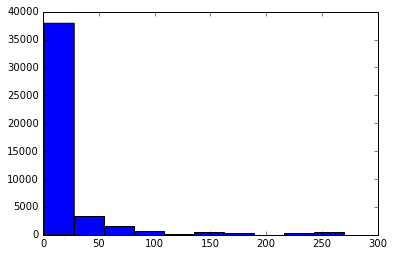

In [15]:
# group statistics 
plt.hist(catalog1['grp_size'], type=step)
plt.hist(catalog1['grp_size'], type=step)
plt.hist(catalog1['grp_size'], type=step)

In [19]:
gold = catalog1[(catalog1['ab_mag'] < 25.3)] 
cosmic_shear_g1 = 0. 
cosmic_shear_g2 = 0. 

In [6]:
#calculate min_sep and max_sep
catalog_sort_mag = sorted(gold1, key=lambda x: (x['dx']**2 + x['dy']**2))
max_sep = math.sqrt((catalog_sort_mag[-1]['dx'] - catalog_sort_mag[-7]['dx'])**2 + (catalog_sort_mag[-1]['dy'] - catalog_sort_mag[-7]['dy'])**2)
catalog_sort_abs = sort(abs(gold1['dx']))
min_sep = catalog_sort_abs[1] - catalog_sort_abs[0]
print max_sep
print min_sep

820.155913344
0.0240768


In [7]:
#check things josh suggested.
#use gold sample 
print gold1['bias_g1'].mean()
print math.sqrt(gold1['bias_g1'].var())
print
print gold1['bias_g2'].mean()
print math.sqrt(gold1['bias_g2'].var())
print

0.00223546
3.98805097164

0.0552304
6.76164258785



In [20]:
shears_e1 = []
shears_e2 = []
for entry in gold:
    g1 = entry['e1']
    g2 = entry['e2']
    epsilon = galsim.Shear(g1=g1,g2=g2)
    g = galsim.Shear(g1=entry['bias_g1']+cosmic_shear_g1, g2=entry['bias_g2']+cosmic_shear_g2)
    e = epsilon + g
    shears_e1.append(e.g1)
    shears_e2.append(e.g2)

ValueError: Requested shear exceeds 1: 515.120965

In [27]:
print len(gold[(abs(gold['bias_g1']) > 1) |(abs(gold['bias_g2']) > 1) ])
print len(gold)

474
10658


In [8]:
#calculate correlations for gold. 
#with bias on shear. 
#calculate and demonstrate treecorr for catalog1 
cat1 = treecorr.Catalog(x=gold1['dx'],y=gold1['dy'],x_units='arcsec',y_units='arcsec',g1=gold1['bias_g1'],g2=gold1['bias_g2'])
gg1 = treecorr.GGCorrelation(min_sep=min_sep,max_sep=max_sep,nbins=10,sep_units='arcsec')
gg1.process(cat1)
print gg1.xim
print np.sqrt(gg1.varxi)
print gg1.logr

#do now with e.shear(cosmic_shear + bias_g1)
cat1 = treecorr.Catalog(x=gold1['dx'],y=gold1['dy'],x_units='arcsec',y_units='arcsec',g1=gold1['bias_g1'],g2=gold1['bias_g2'])


[ -1.35849208e-05   5.01044476e-03   1.48525472e-01   3.96643214e-01
  -3.50764345e-01  -1.02479016e-02  -3.10498177e-02   5.35091171e-04
   3.03158089e-03  -2.06220520e-03]
[  3.08137081e+01   9.74415009e+00   3.30357627e+00   1.30796907e+00
   4.55812116e-01   1.61514371e-01   5.76594089e-02   2.11432238e-02
   8.38600113e-03   4.90485490e-03]
[-3.20470662 -2.16110651 -1.11750639 -0.07390628  0.96969383  2.01329395
  3.05689406  4.10049418  5.14409429  6.1876944 ]


(-1, 1)

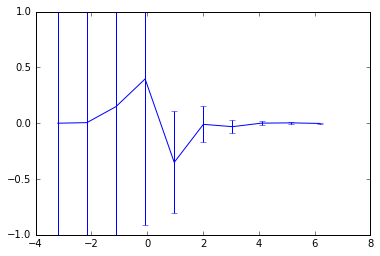

In [10]:
#plot in a fancy way. 
plt.errorbar(gg1.logr, gg1.xim, yerr=np.sqrt(gg1.varxi))
plt.ylim(-1,1)

### Catalogue2 analysis

In [ ]:
## check group statistics. 


### See what happens to the population with cosmic sher and group statistics 

In [9]:
catalog1

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,bias_f,bias_s,bias_g1,bias_g2,bias_x,bias_y,bias_f_grp,bias_s_grp,bias_g1_grp,bias_g2_grp,bias_x_grp,bias_y_grp,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
2214322509,2200170838,36,35,1,3236,3247,444,454,1.0,0.0,238.819,-319.693,0.516401,27.4169,0.518883,12149.3,1.08088,1.11031,0.073753,-0.146366,1.27528,0.916113,-0.552019,1.25073,0.409874,0.888373,0.888307,0.888224,0.227531,0.219346,4.20776,2.72145,2.87452,320893.0,11.2382,1.10926,-2.01458,0.0950256,0.0747375,335043.0,11.4197,1.07438,-2.39015,0.547393,0.252749,4.32714,2.7763,2.97733,nan,nan,nan,0.0,0.0
2213221225,2200170838,36,28,1,3201,3209,452,461,1.0,0.0,231.507,-318.24,2.96548,27.2805,0.0100918,13775.3,0.145562,0.151919,-0.176149,0.108134,0.179525,0.118024,1.29552,0.635012,0.591804,2.7721,2.77094,2.77033,1.8895,1.88603,3.23095,3.0282,2.80309,7081.93,-17.9639,-10.9724,6.8122,0.0016535,0.000666451,7042.09,-17.9933,-10.9651,6.79978,0.00214231,0.00169208,3.23345,3.02902,2.80398,nan,nan,nan,0.0,0.0
2213832765,2200170838,36,29,1,3215,3224,455,463,1.0,0.0,234.398,-317.7,0.683066,27.3607,-0.21286,12794.4,0.148595,0.151039,0.00700334,-0.127535,0.168959,0.130686,-0.757969,0.634851,0.628997,2.5683,2.56731,2.56686,1.73184,1.72983,3.13798,2.84177,3.06657,8087.37,-16.8191,0.433178,-7.95275,-0.000361773,1.97572e-05,8102.9,-16.8253,0.434027,-7.95754,-0.000387156,-3.96964e-05,3.13961,2.84229,3.06716,nan,nan,nan,0.0,0.0
2214602712,2206640565,2,1,1,3149,3157,457,466,1.0,0.0,221.175,-317.188,3.23816,27.4955,-0.0119038,11300.0,0.152348,0.158427,-0.130865,0.148252,0.18615,0.124684,1.14699,0.636593,0.933744,2.2555,2.25474,2.25471,1.49876,1.42649,3.76836,3.35804,3.42366,9904.27,-23.1757,-10.7491,12.2286,0.00184244,-0.00509545,10265.9,-23.7065,-10.1357,12.0776,-0.00147638,-0.01336,3.83512,3.40838,3.44279,nan,nan,nan,0.0,0.0
2201272641,2200170838,36,6,1,3177,3202,412,429,0.930439,0.0695615,228.385,-325.361,1.233,23.9101,0.417097,307089.0,0.371826,0.4614,0.457709,-0.0552518,0.612192,0.225835,-0.0600663,0.755404,0.9643,47.7854,47.5192,47.5135,30.5068,21.3511,0.0877179,0.0814383,0.0440881,334.635,-0.00868604,0.0104389,-0.00126001,3.35998e-08,4.58155e-08,-7440.37,-0.070242,0.0776311,-0.0143182,-0.00240269,-0.012364,0.12158,0.112491,0.0494165,nan,nan,nan,0.0,2.98023e-09
2209286187,2200170838,36,34,1,3182,3198,422,436,1.0,0.0,228.493,-323.751,0.793642,26.5588,1.04664,26778.3,1.90251,1.92233,0.0920748,-0.043432,2.10714,1.71775,-0.220378,2.00175,0.102007,1.15925,1.15917,1.15861,0.255394,0.212035,3.16491,2.04118,2.01912,487387.0,7.6729,0.618593,-0.310698,0.0627348,-0.0120064,668075.0,9.08937,0.143428,-0.376486,-0.0777103,-5.68559,3.58042,2.66606,2.15897,nan,nan,nan,0.0,0.0
2216818333,2200170838,36,33,1,3180,3187,460,467,1.0,0.0,227.289,-316.744,2.11807,27.9893,-0.06637,7171.1,0.132606,0.133632,0.0781198,-0.040055,0.144806,0.121433,-0.236893,0.630959,0.638744,1.45326,1.45293,1.4528,0.935421,0.640331,6.7241,6.44647,6.31057,18971.5,-77.4617,21.3988,-11.914,0.00469766,0.000198213,25099.3,-97.8489,36.9593,-26.4016,-0.0717455,-0.183476,7.6648,7.20729,6.8729,nan,nan,nan,0.0,0.0
2208277203,2200170838,36,23,1,3175,3187,453,465,0.704855,0.295145,226.742,-317.662,2.47147,26.3707,-0.014204,31844.2,0.330121,0.330877,0.00610489,0.0474397,0.346307,0.314691,0.721406,0.699737,0.944109,5.24545,5.2418,5.24172,3.02951,2.21555,0.884779,0.725059,0.743513,2793.3,-0.783912,0.0309683,0.241538,-8.43434e-05,-0.0

In [10]:
catalog2

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit,bias_f,bias_s,bias_g1,bias_g2,bias_x,bias_y,bias_f_grp,bias_s_grp,bias_g1_grp,bias_g2_grp,bias_x_grp,bias_y_grp
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
2214322509,2200170838,36,35,1,3236,3247,444,454,1.0,0.0,238.819,-319.693,0.516401,27.4169,0.518883,12149.3,1.08115,1.1064,0.084309,-0.126395,1.26004,0.927655,-0.491272,1.25006,0.394489,0.89038,0.890314,0.890225,0.22985,0.221404,4.16826,2.70561,2.85168,4.28523,2.76027,2.95333,nan,nan,nan,0.0,0.0,314348.0,10.9758,1.07537,-1.91377,0.232318,0.108761,328314.0,11.1372,1.02855,-2.29113,0.709213,0.302885
2213221225,2200170838,36,28,1,3201,3209,452,461,1.0,0.0,231.507,-318.24,2.96548,27.2805,0.0100918,13775.3,0.145598,0.15215,-0.16549,0.128845,0.180141,0.117679,1.24003,0.635064,0.605402,2.7717,2.77055,2.76997,1.88926,1.88603,3.24227,2.99575,2.84701,3.24461,2.99654,2.84787,nan,nan,nan,0.0,0.0,7076.95,-18.0666,-10.5615,7.71143,0.00167651,0.000637638,7036.03,-18.095,-10.5523,7.70077,0.00214705,0.00166297
2213832765,2200170838,36,29,1,3215,3224,455,463,1.0,0.0,234.398,-317.7,0.683066,27.3607,-0.21286,12794.4,0.148632,0.150413,0.0171986,-0.107778,0.165845,0.133206,-0.706278,0.634712,0.62917,2.56962,2.56863,2.56818,1.73331,1.73129,3.10087,2.84958,3.02638,3.1025,2.8501,3.02695,nan,nan,nan,0.0,0.0,8059.1,-16.4987,0.859796,-7.02242,-0.000399639,3.8622e-05,8074.55,-16.5048,0.860951,-7.02654,-0.000421453,-2.16637e-05
2214602712,2206640565,2,1,1,3149,3157,457,466,1.0,0.0,221.175,-317.188,3.23816,27.4955,-0.0119038,11300.0,0.152386,0.15905,-0.119976,0.168464,0.187966,0.123541,1.09482,0.636739,0.933611,2.25447,2.25371,2.25368,1.49755,1.42529,3.80448,3.32718,3.48542,3.87194,3.38028,3.50239,nan,nan,nan,0.0,0.0,9918.52,-23.5566,-10.2599,13.4679,0.00177299,-0.00502406,10282.3,-24.0997,-9.62468,13.3724,-0.00129582,-0.0134424
2201272641,2200170838,36,6,1,3177,3202,412,429,0.930439,0.0695615,228.385,-325.361,1.233,23.9101,0.417097,307089.0,0.371919,0.464382,0.466387,-0.0306184,0.617329,0.224068,-0.0327781,0.75663,0.962292,47.7086,47.4437,47.4377,30.453,20.9784,0.088623,0.0824916,0.0436927,0.123988,0.114229,0.0487761,nan,nan,nan,0.0,2.98023e-09,335.71,-0.00887676,0.010697,-0.000973041,6.03782e-08,1.08367e-08,-7763.46,-0.0723146,0.0781736,-0.0130649,-0.00283442,-0.0126249
2209286187,2200170838,36,34,1,3182,3198,422,435,1.0,0.0,228.493,-323.751,0.793642,26.5588,1.04664,26778.3,1.90299,1.92397,0.102122,-0.0231984,2.1139,1.71312,-0.111686,2.00231,0.0998679,1.15919,1.15911,1.15854,0.255213,0.210021,3.16768,2.06244,1.99805,3.61252,2.71199,2.14339,nan,nan,nan,0.0,0.0,488330.0,7.69304,0.570471,-0.348829,-0.0391713,0.142215,681309.0,9.33365,0.00890127,-0.462606,-0.17905,-5.60368
2216818333,2200170838,36,33,1,3180,3187,460,467,1.0,0.0,227.289,-316.744,2.11807,27.9893,-0.06637,7171.1,0.132639,0.133727,0.0881606,-0.0198823,0.14522,0.121147,-0.110907,0.630979,0.644052,1.45231,1.45198,1.45185,0.929708,0.645557,6.78395,6.53426,6.2945,7.63028,7.22915,6.8115,nan,nan,nan,0.0,0.0,19432.4,-78.2725,24.4444,-7.37638,0.00929905,-0.0152817,24898.3,-97.0309,38.7544,-20.554,-0.0580452,-0.170373
2208277203,2200170838,36,23,1,3175,3187,454,465,0.704855,0.295145,226.742,-317.662,2.47147,26.3707,-0.014204,31844.2,0.330203,0.331791,0.0161124,0.067366,0.353925,0.308071,0.668015,0.700082,0.948962,5.24153,5.23789,5.23781,3.02329,2.24624,0.891551,0.725584,0.748532,1.05502,0.842388,0.939294,nan,nan,nan,0.0,0.0,2698.66,